# R Programming & Machine Learning Fundamentals - Homework Assignment

## Course: Business Analytics with R

**Total Points: 188 + 15 Bonus = 203 possible points**

### Instructions
1. Complete all tasks by writing R code in the provided cells
2. Run each cell to verify your code works correctly
3. Use the `mlba` package datasets (WestRoxbury, ToyotaCorolla)
4. Comment your code to explain your reasoning
5. Show your output - do not suppress results

### Skills Tested
- Data Import and Exploration (including `class()`)
- Descriptive Statistics (including `pastecs::stat.desc()`)
- Data Transformation and Recoding (including `attach()`/`detach()`)
- Correlation Analysis (Pearson and Spearman)
- Data Visualization (including correlation heatmaps)
- Normality Testing
- Sampling Techniques
- Data Preprocessing
- Data Partitioning
- Predictive Modeling
- File I/O (`read.csv()`, `write.csv()`)

---

## Setup: Load Required Libraries

Run this cell first to load all necessary packages.

In [2]:
if (!require(devtools)) install.packages("devtools")
devtools::install_github("gedeck/mlba/mlba", force=TRUE)

Loading required package: devtools

Loading required package: usethis



Using github PAT from envvar GITHUB_TOKEN. Use `gitcreds::gitcreds_set()` and unset GITHUB_TOKEN in .Renviron (or elsewhere) if you want to use the more secure git credential store instead.





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp1hJ7Uu/remotes7aee727c1a/gedeck-mlba-ba29295/mlba/DESCRIPTION’ ... OK
* preparing ‘mlba’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘mlba_2.0.0.tar.gz’



Warning message in i.p(...):
“installation of package ‘/tmp/Rtmp1hJ7Uu/file7ae47ff378/mlba_2.0.0.tar.gz’ had non-zero exit status”


In [ ]:
library(Hmisc)
library(psych)
library(pastecs)
library(caret)
library(fastDummies)
library(e1071)


In [ ]:
# Load required libraries
library(mlba)
library(tidyverse)
install.packages("psych")
install.packages("pastecs")
install.packages("caret")
install.packages("fastDummies")
install.packages("e1071")
library(Hmisc)
library(psych)
library(pastecs)
library(caret)
library(fastDummies)
library(e1071)

# Disable scientific notation
options(scipen=999)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘boot’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘psych’


The following object is masked from ‘package:Hmisc’:

    describe


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is maske

---

## Part 1: Data Import and Exploration (20 points)

In this section, you will load data and explore its structure using R's built-in functions.

### Task 1.1: Load the ToyotaCorolla Dataset (3 points)

Load the `ToyotaCorolla` dataset from the `mlba` package and store it in a variable called `toyota.df`.

In [ ]:
# YOUR CODE HERE
library(mlba)
toyota.df <- ToyotaCorolla
#basic code

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Task 1.2: Check Dataset Dimensions (3 points)

Use the appropriate function to display:
1. The number of rows and columns in the dataset
2. The column names

In [ ]:
# YOUR CODE HERE
dim(toyota.df)
colnames(toyota.df)
#basic code

[1] 1436   39

[1] "Id"                "Model"             "Price"            
 [4] "Age_08_04"         "Mfg_Month"         "Mfg_Year"         
 [7] "KM"                "Fuel_Type"         "HP"               
[10] "Met_Color"         "Color"             "Automatic"        
[13] "CC"                "Doors"             "Cylinders"        
[16] "Gears"             "Quarterly_Tax"     "Weight"           
[19] "Mfr_Guarantee"     "BOVAG_Guarantee"   "Guarantee_Period" 
[22] "ABS"               "Airbag_1"          "Airbag_2"         
[25] "Airco"             "Automatic_airco"   "Boardcomputer"    
[28] "CD_Player"         "Central_Lock"      "Powered_Windows"  
[31] "Power_Steering"    "Radio"             "Mistlamps"        
[34] "Sport_Model"       "Backseat_Divider"  "Metallic_Rim"     
[37] "Radio_cassette"    "Parking_Assistant" "Tow_Bar"

### Task 1.3: Examine Data Structure (4 points)

Use `str()` to display the structure of the dataset. Then identify and list:
1. How many numeric variables are there?
2. How many character/factor variables are there?

In [ ]:
# YOUR CODE HERE
str(toyota.df)
# 13 numeric variables
# 26 character/factor variables
#basic code

'data.frame':	1436 obs. of  39 variables:
 $ Id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Model            : chr  "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" ...
 $ Price            : int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age_08_04        : int  23 23 24 26 30 32 27 30 27 23 ...
 $ Mfg_Month        : int  10 10 9 7 3 1 6 3 6 10 ...
 $ Mfg_Year         : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ KM               : int  46986 72937 41711 48000 38500 61000 94612 75889 19700 71138 ...
 $ Fuel_Type        : chr  "Diesel" "Diesel" "Diesel" "Diesel" ...
 $ HP               : int  90 90 90 90 90 90 90 90 192 69 ...
 $ Met_Color        : int  1 1 1 0 0 0 1 1 0 0 ...
 $ Color            : chr  "Blue" "Silver" "Blue" "Black" ...
 $ Automatic        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC       

### Task 1.4: Preview Data (5 points)

1. Display the first 8 rows of the dataset
2. Display the last 5 rows of the dataset
3. Display rows 10-15 and columns 1-5 only

In [ ]:
# YOUR CODE HERE
head(toyota.df, 8)
tail(toyota.df, 5)
toyota.df[10:15, 1:5]
#basic code, commands to show beginning and end of file

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,⋯,1,1,0,0,0,1,0,0,0,0
2,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,⋯,0,1,0,0,0,1,0,0,0,0
3,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,⋯,0,1,0,0,0,1,0,0,0,0
4,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,⋯,0,1,0,0,0,1,0,0,0,0
5,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,⋯,1,1,0,1,0,1,0,0,0,0
6,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,⋯,1,1,0,1,0,1,0,0,0,0
7,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,⋯,1,1,0,0,1,1,0,0,0,0
8,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,⋯,1,1,0,0,0,1,0,0,0,0


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1432,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,⋯,1,1,0,1,1,1,0,0,0,0
1433,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,10845,72,9,1998,19000,Petrol,86,0,⋯,0,1,0,0,1,1,0,0,0,0
1434,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,8500,71,10,1998,17016,Petrol,86,0,⋯,0,1,0,0,0,1,0,0,0,0
1435,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,7250,70,11,1998,16916,Petrol,86,1,⋯,0,0,0,0,0,1,0,0,0,0
1436,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,⋯,0,1,0,0,0,0,0,0,0,0


,Id,Model,Price,Age_08_04,Mfg_Month
,<int>,<chr>,<int>,<int>,<int>
10,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10
11,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8
12,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors,19950,22,11
13,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,19600,25,8
14,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,21500,31,2
15,15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,22500,32,1


### Task 1.5: Column Access (5 points)

Using the `$` notation:
1. Display the first 10 values of the `Price` column
2. Calculate the length (number of values) of the `Price` column
3. Calculate the mean of the `Price` column

In [ ]:
# YOUR CODE HERE
toyota.df$Price[1:10]
length(toyota.df$Price)
as.numeric(mean(toyota.df$Price))
#basic commands again, as.numeric makes the file convert to numeric when ran

[1] 13500 13750 13950 14950 13750 12950 16900 18600 21500 12950

[1] 1436

[1] 10730.82

### Task 1.6: Check Data Type with class() (3 points)

Use the `class()` function to check the data type of:
1. The entire `toyota.df` dataframe
2. The `Price` column
3. The `Fuel_Type` column

In [ ]:
# YOUR CODE HERE
class(toyota.df)
class(toyota.df$Price)
class(toyota.df$Fuel_Type)

[1] "data.frame"

[1] "integer"

[1] "character"

---

## Part 2: Descriptive Statistics (20 points)

Calculate and interpret summary statistics using multiple methods.

### Task 2.1: Basic Summary Statistics (5 points)

Use the `summary()` function on the `Price` column. What are the mean and median values?

In [ ]:
# YOUR CODE HERE
summary(toyota.df$Price)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4350    8450    9900   10731   11950   32500 

### Task 2.2: Five-Number Summary (5 points)

Use `fivenum()` to get the five-number summary for the `KM` (mileage) column. What is the IQR (interquartile range)?

In [ ]:
# YOUR CODE HERE
fivenum(toyota.df$KM)
IQR(toyota.df$KM)
#five number summary and interquartile range commands

[1]      1.0  43000.0  63389.5  87041.5 243000.0

[1] 44020.75

### Task 2.3: Detailed Statistics with Hmisc (5 points)

Use `Hmisc::describe()` to get detailed statistics for the `HP` (horsepower) column. How many missing values are there?

In [ ]:
# YOUR CODE HERE
Hmisc::describe(toyota.df$HP)
# 4 missing values
#statistics command

toyota.df$HP 
       n  missing distinct     Info     Mean  pMedian      Gmd      .05 
    1436        0       12    0.797    101.5    103.5    13.92       72 
     .10      .25      .50      .75      .90      .95 
      86       90      110      110      110      110 
                                                                            
Value         69    71    72    73    86    90    97    98   107   110   116
Frequency     34     1    73     1   249    36   164     2    21   835     9
Proportion 0.024 0.001 0.051 0.001 0.173 0.025 0.114 0.001 0.015 0.581 0.006
                
Value        192
Frequency     11
Proportion 0.008

### Task 2.5: Detailed Statistics with pastecs (5 points)

Use `pastecs::stat.desc()` to get comprehensive statistics for the `KM` column. Identify the coefficient of variation (coef.var) from the output.

In [ ]:
# YOUR CODE HERE
pastecs::stat.desc(toyota.df$KM)
# coef.var 0.547273674262527
#statistic command

nbr.val           nbr.null             nbr.na                min 
      1436.0000000          0.0000000          0.0000000          1.0000000 
               max              range                sum             median 
    243000.0000000     242999.0000000   98413761.0000000      63389.5000000 
              mean            SE.mean       CI.mean.0.95                var 
     68533.2597493        989.7573304       1941.5262965 1406733707.0021696 
           std.dev           coef.var 
     37506.4488722          0.5472737

### Task 2.4: Skewness and Kurtosis (5 points)

Use `psych::describe()` to calculate statistics for the `Price` column. Based on the skewness value:
1. Is the distribution symmetric, moderately skewed, or highly skewed?
2. Would you recommend using mean or median to describe the typical price?

In [ ]:
# YOUR CODE HERE
psych::describe(toyota.df$Price)
#High positive skew
#Using Median is better, as it prevents outliers

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1436,10730.82,3626.965,9900,10160.59,2446.29,4350,32500,28150,1.700327,3.711247,95.71193


---

## Part 3: Data Transformation (20 points)

Create new variables and transform existing ones.

### Task 3.1: Create Calculated Variables (5 points)

Using the `$` notation, create a new column called `Price_Per_KM` that calculates the price per kilometer driven (Price / KM). Display the first 5 values of this new column.

In [ ]:
# YOUR CODE HERE
toyota.df$Price_Per_KM <- toyota.df$Price / toyota.df$KM
#price divided by km to get price per km
head(toyota.df$Price_Per_KM, 5)
#list command


[1] 0.2873196 0.1885189 0.3344442 0.3114583 0.3571429

### Task 3.2: Transform with Multiple Variables (5 points)

Using `transform()`, create two new columns in a new dataframe called `toyota_transformed`:
1. `Total_Value` = Price + (HP * 50)  (estimating value based on horsepower)
2. `Age_Months` = Age_08_04 * 12  (convert age in years to months)

Display the names of the new dataframe to verify the columns were added.

In [ ]:
# YOUR CODE HERE
toyota_transformed <- transform(
  toyota.df,
  Total_Value = Price + (HP * 50),
  Age_Months = Age_08_04 * 12
)
#making new columns
head(toyota_transformed[, c("Total_Value", "Age_Months")], 5)
#displaying names

,Total_Value,Age_Months
,<dbl>,<dbl>
1,18000,276
2,18250,276
3,18450,288
4,19450,312
5,18250,360


### Task 3.3: Recode Binary Variable (5 points)

Using `ifelse()`, create a new column called `High_Mileage` that contains:
- "High" if KM > 100000
- "Low" if KM <= 100000

Display a table showing the count of each category.

In [ ]:
# YOUR CODE HERE
toyota.df$High_Mileage <- ifelse(toyota.df$KM > 100000, "High", "Low")
#command to show high or low based on input
table(toyota.df$High_Mileage)



High  Low 
 242 1194 

### Task 3.5: Using attach() and detach() (5 points)

Use the `attach()` and `detach()` functions to create a new column called `HP_Per_Weight` that calculates HP divided by Weight, without using the `$` notation or dataframe prefix inside the calculation.

**Note:** Remember to detach after you're done!

In [ ]:
# YOUR CODE HERE
attach(toyota.df)

toyota.df$HP_Per_Weight <- HP / Weight
#hp/weight
detach(toyota.df)

toyota.df$HP_Per_Weight

[1] 0.07725322 0.07725322 0.07725322 0.07725322 0.07692308 0.07692308
   [7] 0.07228916 0.07228916 0.16202532 0.06244344 0.16202532 0.16202532
  [13] 0.16202532 0.16202532 0.16202532 0.16202532 0.16202532 0.09954751
  [19] 0.10328638 0.09954751 0.09954751 0.09401709 0.09821429 0.09821429
  [25] 0.09821429 0.09821429 0.09821429 0.09821429 0.09821429 0.09821429
  [31] 0.08818182 0.08818182 0.08818182 0.08818182 0.08818182 0.08818182
  [37] 0.08818182 0.08818182 0.08818182 0.08818182 0.08818182 0.08818182
  [43] 0.08818182 0.07171315 0.07171315 0.07086614 0.07171315 0.08738739
  [49] 0.07171315 0.16066946 0.07171315 0.08738739 0.09322034 0.16066946
  [55] 0.09442060 0.10232558 0.08738739 0.08738739 0.09322034 0.09734513
  [61] 0.08738739 0.09734513 0.09734513 0.09734513 0.08738739 0.10232558
  [67] 0.09734513 0.08738739 0.08627451 0.08738739 0.08738739 0.09150943
  [73] 0.09734513 0.08738739 0.09734513 0.09865471 0.09734513 0.09865471
  [79] 0.09865471 0.08738739 0.09322034 0.09865471 0.08738739 0.09322034
  [85] 0.08738739 0.09734513 0.08818182 0.07228916 0.08818182 0.08695652
  [91] 0.08818182 0.07142857 0.07142857 0.08818182 0.09821429 0.07142857
  [97] 0.08818182 0.08818182 0.09821429 0.08818182 0.09821429 0.08818182
 [103] 0.06311111 0.09954751 0.09523810 0.08818182 0.10526316 0.08818182
 [109] 0.09954751 0.07837838 0.07837838 0.07837838 0.08787879 0.08787879
 [115] 0.09133858 0.07031250 0.07086614 0.09954751 0.07171315 0.08627451
 [121] 0.09865471 0.07171315 0.09865471 0.09734513 0.09734513 0.09734513
 [127] 0.10232558 0.08738739 0.08546256 0.10232558 0.08738739 0.08738739
 [133] 0.08738739 0.09954751 0.08738739 0.08738739 0.08546256 0.09954751
 [139] 0.08787879 0.09734513 0.08738739 0.16202532 0.09734513 0.10091743
 [145] 0.09734513 0.08738739 0.09442060 0.09734513 0.09734513 0.09565217
 [151] 0.08738739 0.09734513 0.08738739 0.09865471 0.09734513 0.08940092
 [157] 0.09954751 0.09865471 0.09734513 0.09322034 0.09954751 0.09954751
 [163] 0.09865471 0.10000000 0.08738739 0.09734513 0.09734513 0.09565217
 [169] 0.09734513 0.09201878 0.10232558 0.09734513 0.08738739 0.08738739
 [175] 0.09734513 0.09734513 0.09865471 0.09865471 0.09734513 0.09734513
 [181] 0.10232558 0.08738739 0.08738739 0.09734513 0.08909091 0.10232558
 [187] 0.06216216 0.07758621 0.07468880 0.10147601 0.06244344 0.06216216
 [193] 0.06216216 0.06052632 0.06052632 0.10232558 0.06301370 0.07468880
 [199] 0.09463415 0.09830206 0.10232558 0.09463415 0.10232558 0.06216216
 [205] 0.06052632 0.10526316 0.10232558 0.09150943 0.10185185 0.09812667
 [211] 0.06052632 0.07468880 0.09954751 0.10232558 0.07692308 0.10232558
 [217] 0.06244344 0.09463415 0.09463415 0.10232558 0.10232558 0.06811146
 [223] 0.10232558 0.10309278 0.10232558 0.10232558 0.10576923 0.09150943
 [229] 0.10185185 0.09150943 0.09463415 0.10232558 0.09417476 0.10526316
 [235] 0.10232558 0.10232558 0.10232558 0.06216216 0.09909910 0.10185185
 [241] 0.10232558 0.10426540 0.10526316 0.07725322 0.10232558 0.10232558
 [247] 0.10476190 0.10679612 0.10138249 0.10232558 0.10232558 0.10679612
 [253] 0.10232558 0.09954751 0.10232558 0.10232558 0.10232558 0.09463415
 [259] 0.09463415 0.10232558 0.09463415 0.10232558 0.10679612 0.10232558
 [265] 0.09150943 0.10232558 0.10185185 0.10576923 0.07468880 0.10576923
 [271] 0.06244344 0.10232558 0.06244344 0.10679612 0.10232558 0.10232558
 [277] 0.09150943 0.10576923 0.09463415 0.10426540 0.09150943 0.10185185
 [283] 0.08940092 0.09954751 0.10232558 0.10232558 0.10232558 0.09463415
 [289] 0.09150943 0.10232558 0.10576923 0.10232558 0.10476190 0.10232558
 [295] 0.10185185 0.10576923 0.09972801 0.10185185 0.10232558 0.10426540
 [301] 0.10232558 0.10526316 0.10426540 0.09463415 0.09150943 0.09150943
 [307] 0.09463415 0.10576923 0.09463415 0.10232558 0.10185185 0.10185185
 [313] 0.09463415 0.09150943 0.09417476 0.10232558 0.10185185 0.09463415
 [319] 0.09463415 0.10232558 0.10091743 0.10232558 0.10232558 0.10576923
 [325] 0.10232558 0.10232558 0.09463415 0.10232558 0.10232558

### Task 3.4: Recode Multi-Level Variable (5 points)

Create a new column called `Price_Tier` with three categories based on Price:
- "Budget" if Price < 8000
- "Mid-Range" if Price >= 8000 AND Price < 15000
- "Premium" if Price >= 15000

Display a table of the distribution.

In [ ]:
# YOUR CODE HERE
toyota.df$Price_Tier <- ifelse(
  toyota.df$Price < 8000, "Budget",
  ifelse(toyota.df$Price < 15000, "Mid-Range", "Premium")
)
#making a new column like transform with more variables
table(toyota.df$Price_Tier)



   Budget Mid-Range   Premium 
      301       967       168 

### Task 4.4: Spearman Correlation (5 points)

Calculate the Spearman (rank-based) correlation matrix for the same variables (`Price`, `Age_08_04`, `KM`, `HP`). Compare the results to Pearson - are there notable differences?

In [ ]:
# YOUR CODE HERE
vars <- toyota.df[, c("Price", "Age_08_04", "KM", "HP")]

cor_spearman <- cor(vars, method = "spearman", use = "complete.obs")
cor_spearman
#spearman matrix

cor_pearson <- cor(vars, method = "pearson", use = "complete.obs")
cor_pearson
#pearson matrix
#every variable is slightly off from each other

,Price,Age_08_04,KM,HP
Price,1.0000000,-0.84227931,-0.6156287,0.23596963
Age_08_04,-0.8422793,1.00000000,0.5320909,-0.09336606
KM,-0.6156287,0.53209092,1.0000000,-0.20487256
HP,0.2359696,-0.09336606,-0.2048726,1.00000000


,Price,Age_08_04,KM,HP
Price,1.0000000,-0.8765905,-0.5699602,0.3149898
Age_08_04,-0.8765905,1.0000000,0.5056722,-0.1566220
KM,-0.5699602,0.5056722,1.0000000,-0.3335379
HP,0.3149898,-0.1566220,-0.3335379,1.0000000


---

## Part 4: Correlation Analysis (15 points)

Analyze relationships between variables using correlation methods.

### Task 4.1: Pearson Correlation Matrix (5 points)

Select the numeric columns `Price`, `Age_08_04`, `KM`, and `HP` and calculate the Pearson correlation matrix. Round to 3 decimal places.

In [ ]:
# YOUR CODE HERE
vars <- toyota.df[, c("Price", "Age_08_04", "KM", "HP")]

cor_pearson <- cor(vars, method = "pearson", use = "complete.obs")
#same as above command
round(cor_pearson, 3)


,Price,Age_08_04,KM,HP
Price,1.000,-0.877,-0.570,0.315
Age_08_04,-0.877,1.000,0.506,-0.157
KM,-0.570,0.506,1.000,-0.334
HP,0.315,-0.157,-0.334,1.000


### Task 4.2: Interpret Correlations (5 points)

Based on your correlation matrix, answer these questions in a comment:
1. Which variable has the strongest correlation with Price?
2. Is this correlation positive or negative? What does this mean in business terms?
3. Which pair of variables has the weakest correlation?

In [ ]:
# YOUR ANSWERS HERE (as comments)
#Age_08_04 has the strongest correlation with Price, with a value of –0.877
#correlation is negative, which means as age increases, price decreases, which explains normal depreciation
#The weakest correlation is between Age_08_04 and HP, with a value of –0.157

### Task 4.3: Statistical Significance Test (5 points)

Use `cor.test()` to test if the correlation between `Price` and `Age_08_04` is statistically significant. Report the p-value and state your conclusion (α = 0.05).

In [ ]:
# YOUR CODE HERE
cor.test(toyota.df$Price, toyota.df$Age_08_04, method = "pearson")
#selected price and age, pearson tested
#p-value < 0.00000000000000022
#very far below 0.05, reject null hypothesis


	Pearson's product-moment correlation

data:  toyota.df$Price and toyota.df$Age_08_04
t = -68.978, df = 1434, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8880508 -0.8640415
sample estimates:
       cor 
-0.8765905 


### Task 5.4: Correlation Heatmap (5 points)

Create a correlation heatmap visualization for the numeric variables `Price`, `Age_08_04`, `KM`, `HP`, and `Weight`. Use the `image()` function with a color palette that shows negative correlations in blue and positive correlations in red.

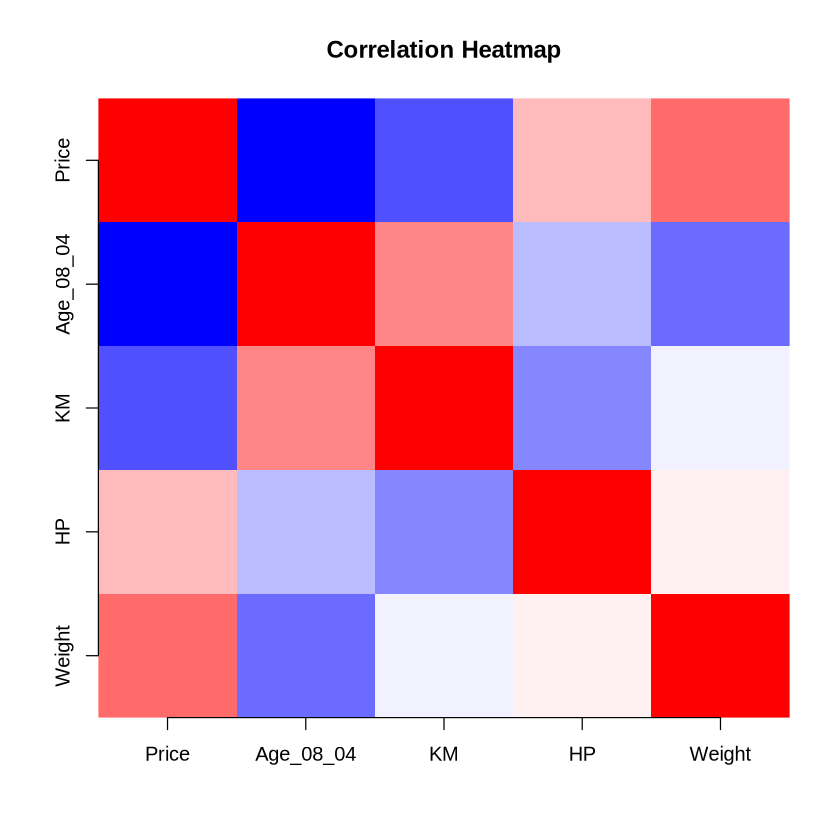

In [ ]:
# YOUR CODE HERE
vars <- toyota.df[, c("Price", "Age_08_04", "KM", "HP", "Weight")]
#selecting variables
cor_mat <- cor(vars, use = "complete.obs")
palette <- colorRampPalette(c("blue", "white", "red"))(20)
#making colors
image(
  1:ncol(cor_mat),
  1:nrow(cor_mat),
  t(cor_mat)[, nrow(cor_mat):1],   # rotate for correct orientation
  col = palette,
  axes = FALSE,
  xlab = "",
  ylab = "",
  main = "Correlation Heatmap"
)
#main heatmap building
axis(1, at = 1:ncol(cor_mat), labels = colnames(cor_mat))
axis(2, at = 1:nrow(cor_mat), labels = rev(colnames(cor_mat)))
#axis labels


---

## Part 5: Data Visualization (15 points)

Create visualizations to explore data distributions and relationships.

### Task 5.1: Boxplot for Outlier Detection (5 points)

Create a boxplot for the `Price` variable. Add a meaningful title and axis label.

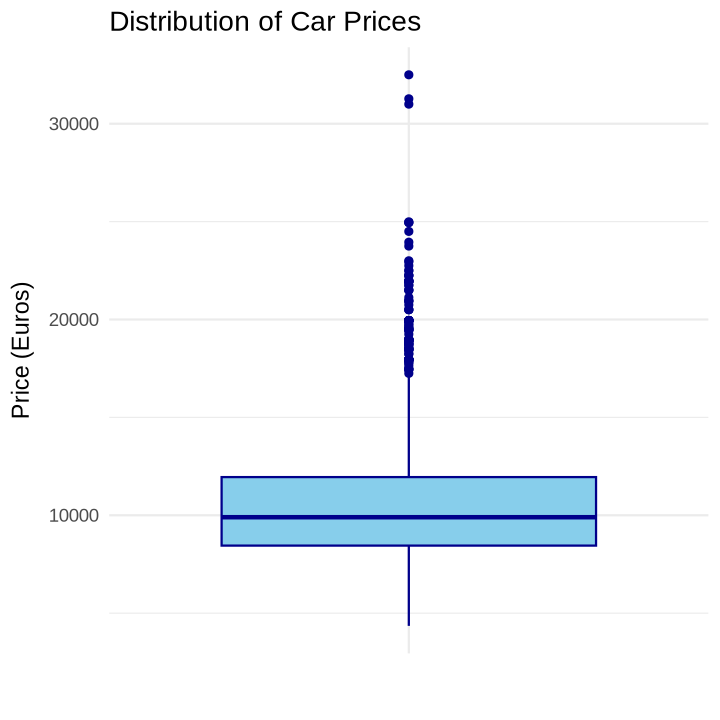

In [ ]:
# YOUR CODE HERE
library(ggplot2)

ggplot(toyota.df, aes(x = "", y = Price)) +
  geom_boxplot(fill = "skyblue", color = "darkblue") +
  labs(
    title = "Distribution of Car Prices",
    y = "Price (Euros)",
    x = ""
  ) +
  theme_minimal(base_size = 14)
#building box plot

### Task 5.2: Density Plot (5 points)

Create a density plot for the `KM` (mileage) variable. Add appropriate title and labels. Based on the shape, describe the distribution (symmetric, left-skewed, right-skewed).

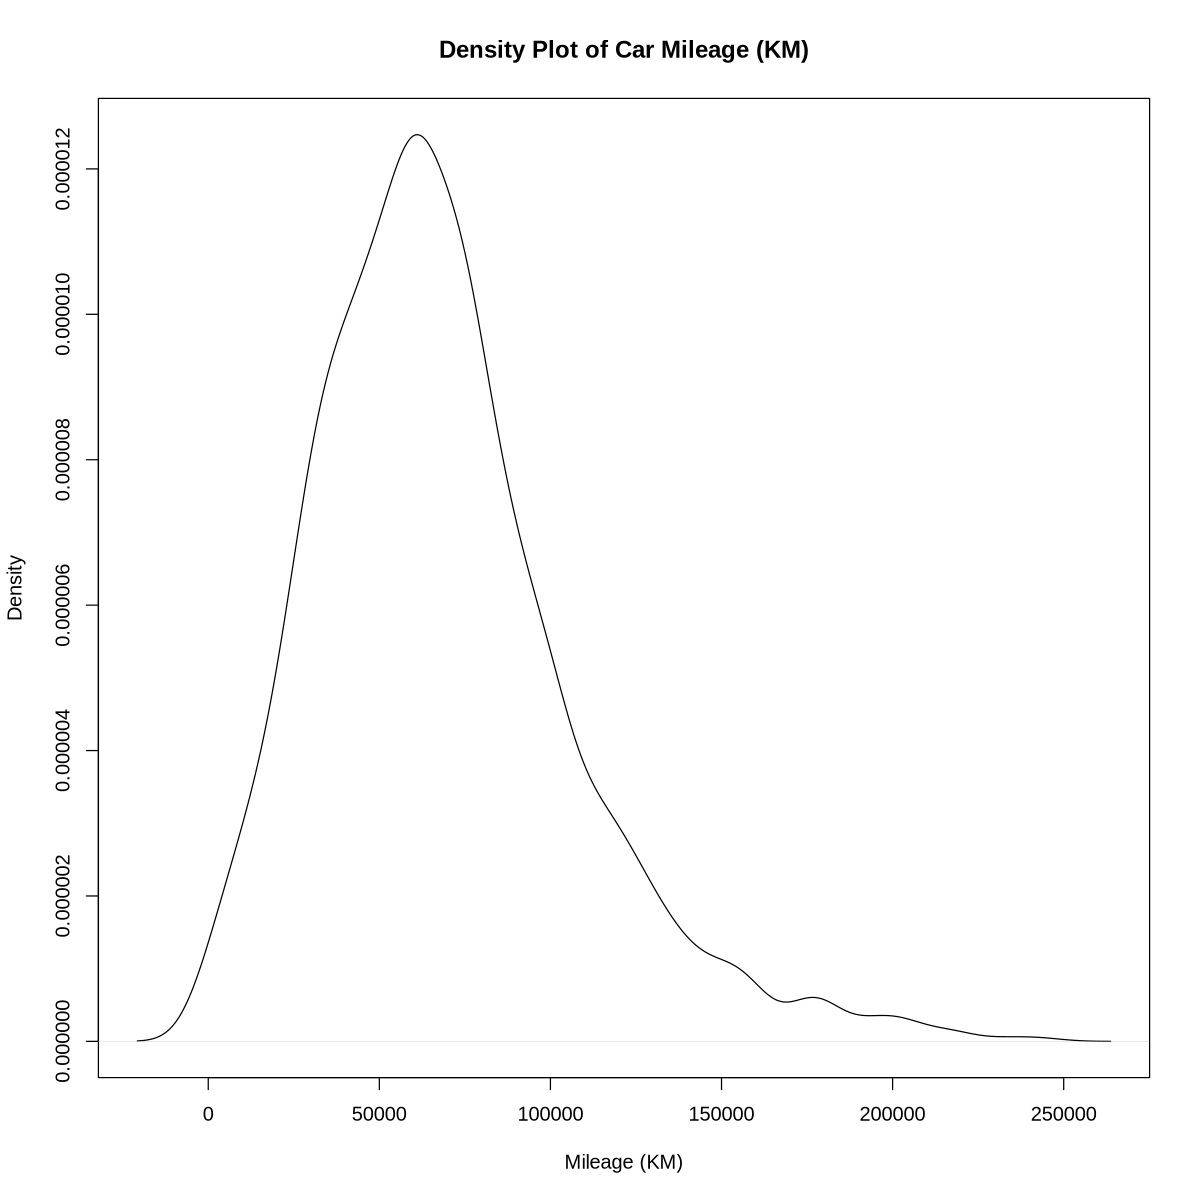

In [ ]:
# YOUR CODE HERE
options(repr.plot.width = 10, repr.plot.height = 10)
#resizing plot
plot(
  density(toyota.df$KM),
  main = "Density Plot of Car Mileage (KM)",
  xlab = "Mileage (KM)",
  ylab = "Density"
)
#plot building, using the plot command to get the line
#it is right skewed


### Task 5.3: Scatterplot with Smoothing (5 points)

Create a scatterplot showing the relationship between `Age_08_04` (x-axis) and `Price` (y-axis). Add a smoothing line using `scatter.smooth()`.

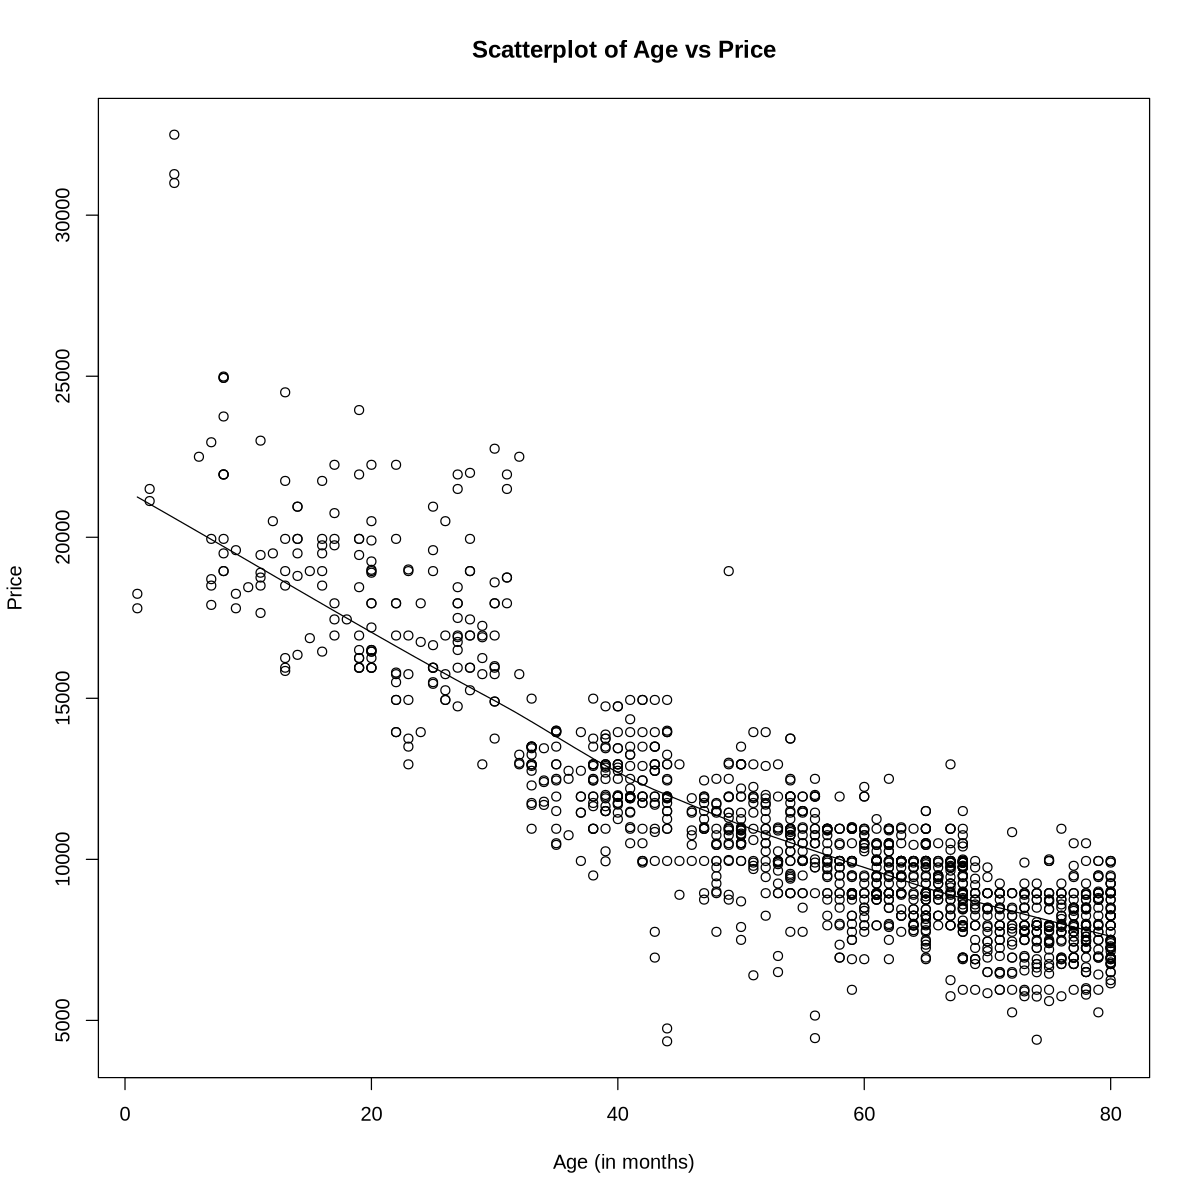

In [ ]:
# YOUR CODE HERE
scatter.smooth(
  x = toyota.df$Age_08_04,
  y = toyota.df$Price,
  main = "Scatterplot of Age vs Price",
  xlab = "Age (in months)",
  ylab = "Price"
)
#building plot, scatter plot command

---

## Part 6: Normality Testing (10 points)

Test whether variables follow a normal distribution.

### Task 6.1: Shapiro-Wilk Test (5 points)

Perform a Shapiro-Wilk normality test on the `Price` variable. State the null hypothesis, report the p-value, and state your conclusion at α = 0.05.

In [ ]:
# YOUR CODE HERE
shapiro.test(toyota.df$Price)
#null hypo: normally distributed population
#p value = 0.00000000000000022
#Reject null hypothesis


	Shapiro-Wilk normality test

data:  toyota.df$Price
W = 0.85228, p-value < 0.00000000000000022


### Task 6.2: Compare Normality of Two Variables (5 points)

Test both `HP` and `Weight` for normality. Which variable is more likely to be normally distributed? Support your answer with the test statistics.

In [ ]:
# YOUR CODE HERE
shapiro.test(toyota.df$HP)
shapiro.test(toyota.df$Weight)
#weight is more likely to be normally distributed
#weight has a higher W stat, meaning it is closer and more likely to be normally distributed over HP


	Shapiro-Wilk normality test

data:  toyota.df$HP
W = 0.70636, p-value < 0.00000000000000022



	Shapiro-Wilk normality test

data:  toyota.df$Weight
W = 0.78081, p-value < 0.00000000000000022


---

## Part 7: Sampling Techniques (15 points)

Apply different sampling methods for data analysis.

### Task 7.1: Simple Random Sampling (5 points)

Using `set.seed(123)` for reproducibility, take a random sample of 10 rows from the toyota dataset. Display the sample.

In [ ]:
# YOUR CODE HERE
set.seed(123)
sample_n <- toyota.df[sample(nrow(toyota.df), 10), ]
sample_n
#random sample command

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,⋯,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Price_Per_KM,High_Mileage,HP_Per_Weight,Price_Tier
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
415,417,TOYOTA Corolla 1.6 HB SOL 2/3-Doors,10900,49,8,2000,97600,Petrol,110,1,⋯,0,0,0,1,0,1,0.1116803,Low,0.10526316,Mid-Range
463,465,TOYOTA Corolla 1.4 16V VVT I LIFTB SOL 4/5-Doors,10750,46,11,2000,69574,Petrol,97,0,⋯,0,1,0,0,0,0,0.1545117,Low,0.09107981,Mid-Range
179,180,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,21950,8,1,2004,5000,Petrol,110,1,⋯,1,1,1,0,0,0,4.3900000,Low,0.09734513,Premium
526,528,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,10250,52,5,2000,49432,Petrol,110,1,⋯,0,1,0,1,0,1,0.2073556,Low,0.10476190,Mid-Range
195,196,TOYOTA Corolla 1.9 D WAGON TERRA Stationwagen,13250,41,4,2001,123425,Diesel,69,1,⋯,0,1,0,0,0,0,0.1073526,High,0.06052632,Mid-Range
938,941,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors,8950,68,1,1999,54875,Petrol,110,1,⋯,1,1,0,0,0,0,0.1630979,Low,0.10280374,Mid-Range
1142,1147,TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors,7950,73,8,1998,103121,Petrol,86,1,⋯,0,0,0,0,0,0,0.0770939,High,0.08309179,Budget
1323,1329,TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors,8950,79,2,1998,66855,Petrol,110,1,⋯,0,1,1,0,0,1,0.1338718,Low,0.10232558,Mid-Range
1253,1259,TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors,7950,72,9,1998,78120,Petrol,110,1,⋯,0,1,0,0,0,0,0.1017665,Low,0.10232558,Budget


### Task 7.2: Weighted Sampling (5 points)

Create a weighted sample of 10 observations that oversamples cars with HP > 100 (give them 90% probability vs 10% for others). Use `set.seed(123)`.

In [ ]:
# YOUR CODE HERE
set.seed(123)
weights <- ifelse(toyota.df$HP > 100, 0.9, 0.1)
weights <- weights / sum(weights)
sample_weighted <- toyota.df[sample(1:nrow(toyota.df), 10, prob = weights), ]
#weighted sampling command
sample_weighted


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,⋯,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Price_Per_KM,High_Mileage,HP_Per_Weight,Price_Tier
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1369,1375,TOYOTA Corolla 1.6 HB LINEA LUNA 2/3-Doors,9750,70,11,1998,57829,Petrol,110,0,⋯,0,0,0,0,0,0,0.16860053,Low,0.10476190,Mid-Range
370,372,TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors,13250,44,1,2001,21027,Petrol,110,1,⋯,0,1,0,0,0,1,0.63014220,Low,0.10185185,Mid-Range
1061,1065,TOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors,7950,71,10,1998,164000,Petrol,110,1,⋯,0,0,0,0,0,0,0.04847561,High,0.10476190,Budget
415,417,TOYOTA Corolla 1.6 HB SOL 2/3-Doors,10900,49,8,2000,97600,Petrol,110,1,⋯,0,0,0,1,0,1,0.11168033,Low,0.10526316,Mid-Range
925,928,TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-Doors,9950,63,6,1999,57000,Petrol,86,1,⋯,0,1,0,0,0,0,0.17456140,Low,0.08309179,Mid-Range
1112,1117,TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stationwagen,8500,71,10,1998,120000,Petrol,110,0,⋯,1,1,1,0,0,0,0.07083333,High,0.10138249,Mid-Range
248,249,TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors,12900,39,6,2001,55678,Petrol,110,1,⋯,0,1,1,0,0,1,0.23168936,Low,0.10679612,Mid-Range
839,842,TOYOTA Corolla 1.6 16V HATCHB G6 2/3-Doors,9950,59,10,1999,67010,Petrol,110,1,⋯,0,1,1,1,0,1,0.14848530,Low,0.10328638,Mid-Range
712,715,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors,8250,64,5,1999,91333,Petrol,110,1,⋯,1,1,0,0,0,0,0.09032880,Low,0.10476190,Mid-Range


### Task 7.3: Class Rebalancing with Upsampling (5 points)

1. First, convert `Fuel_Type` to a factor and display the class distribution using `table()`
2. Use `caret::upSample()` to balance the classes
3. Display the new distribution

In [ ]:
# YOUR CODE HERE
toyota.df$Fuel_Type <- as.factor(toyota.df$Fuel_Type)
#making fuel type a factor
library(caret)
set.seed(123)
toyota.up <- upSample(
  x = toyota.df[, setdiff(names(toyota.df), "Fuel_Type")],
  y = toyota.df$Fuel_Type
)
#balancing each class
table(toyota.up$Class)



   CNG Diesel Petrol 
  1264   1264   1264 

---

## Part 8: Data Preprocessing (15 points)

Prepare data for machine learning models.

### Task 8.1: Handle Missing Values (5 points)

1. First, simulate missing data by setting 15 random `Age_08_04` values to NA (use `set.seed(42)`)
2. Show the summary to confirm NA values exist
3. Impute the missing values using the median
4. Verify no NAs remain

In [ ]:
# YOUR CODE HERE
set.seed(42)
missing_idx <- sample(1:nrow(toyota.df), 15)
toyota.df$Age_08_04[missing_idx] <- NA
#setting 15 random values to NA
summary(toyota.df$Age_08_04)
median_age <- median(toyota.df$Age_08_04, na.rm = TRUE)
toyota.df$Age_08_04[is.na(toyota.df$Age_08_04)] <- median_age
#impute values with median
sum(is.na(toyota.df$Age_08_04))



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   44.00   61.00   55.95   70.00   80.00      15 

[1] 0

### Task 8.2: Convert to Factor (5 points)

Convert the `Fuel_Type` column to a factor. Display the structure and levels of the converted variable.

In [ ]:
# YOUR CODE HERE
toyota.df$Fuel_Type <- as.factor(toyota.df$Fuel_Type)
str(toyota.df$Fuel_Type)
levels(toyota.df$Fuel_Type)


 Factor w/ 3 levels "CNG","Diesel",..: 2 2 2 2 2 2 2 2 3 2 ...


[1] "CNG"    "Diesel" "Petrol"

### Task 8.3: Create Dummy Variables (5 points)

Using `fastDummies::dummy_cols()`, create dummy variables for `Fuel_Type`. Remove the original column and the first dummy (reference category). Display the new column names to verify.

In [ ]:
# YOUR CODE HERE
library(fastDummies)
toyota.dummy <- dummy_cols(
  toyota.df,
  select_columns = "Fuel_Type",
  remove_selected_columns = FALSE
)
#making dummy variables
toyota.dummy$Fuel_Type <- NULL
toyota.dummy$Fuel_Type_CNG <- NULL
#removing both original column and first dummy
colnames(toyota.dummy)

[1] "Id"                "Model"             "Price"            
 [4] "Age_08_04"         "Mfg_Month"         "Mfg_Year"         
 [7] "KM"                "HP"                "Met_Color"        
[10] "Color"             "Automatic"         "CC"               
[13] "Doors"             "Cylinders"         "Gears"            
[16] "Quarterly_Tax"     "Weight"            "Mfr_Guarantee"    
[19] "BOVAG_Guarantee"   "Guarantee_Period"  "ABS"              
[22] "Airbag_1"          "Airbag_2"          "Airco"            
[25] "Automatic_airco"   "Boardcomputer"     "CD_Player"        
[28] "Central_Lock"      "Powered_Windows"   "Power_Steering"   
[31] "Radio"             "Mistlamps"         "Sport_Model"      
[34] "Backseat_Divider"  "Metallic_Rim"      "Radio_cassette"   
[37] "Parking_Assistant" "Tow_Bar"           "Price_Per_KM"     
[40] "High_Mileage"      "HP_Per_Weight"     "Price_Tier"       
[43] "Fuel_Type_Diesel"  "Fuel_Type_Petrol"

---

## Part 9: Data Partitioning (10 points)

Split data properly for model training and evaluation.

### Task 9.1: Holdout Partition (5 points)

Using `set.seed(1)`, create a 70/30 train/test split:
1. Randomly select 70% of row indices for training
2. Use the remaining 30% for the holdout set
3. Print the number of rows in each set

In [ ]:
# YOUR CODE HERE
set.seed(1)
train_idx <- sample(1:nrow(toyota.df), size = 0.7 * nrow(toyota.df))
#selecting 70%
train_set <- toyota.df[train_idx, ]
test_set  <- toyota.df[-train_idx, ]
#making each sets
cat("Training rows:", nrow(train_set), "\n")
cat("Test rows:", nrow(test_set), "\n")
#printing sets


Training rows: 1005 
Test rows: 431 


### Task 9.2: Stratified Partitioning with caret (5 points)

Use `caret::createDataPartition()` to create a stratified 60/40 split based on the `Price` variable. This ensures the distribution of Price is similar in both sets. Use `set.seed(1)`.

In [ ]:
# YOUR CODE HERE
library(caret)
set.seed(1)
train_idx <- createDataPartition(toyota.df$Price, p = 0.6, list = FALSE)
#selecting the 60/40 split
train_set <- toyota.df[train_idx, ]
test_set  <- toyota.df[-train_idx, ]
cat("Training rows:", nrow(train_set), "\n")
cat("Test rows:", nrow(test_set), "\n")
#same commands as above

Training rows: 863 
Test rows: 573 


---

## Part 10: Predictive Modeling (10 points)

Build and evaluate a simple predictive model.

### Task 10.1: Build Linear Regression Model (5 points)

Using the WestRoxbury housing dataset:
1. Load and preprocess the data (convert REMODEL to factor, remove TAX column)
2. Create a 60/40 train/test split using `set.seed(1)`
3. Build a linear regression model to predict `TOTAL.VALUE` using all other variables
4. Display the first 5 predicted values on the training set

In [ ]:
# YOUR CODE HERE
library(mlba)
data("WestRoxbury")
wr <- WestRoxbury
wr$REMODEL <- as.factor(wr$REMODEL)
wr$TAX <- NULL
#preprocessing data
set.seed(1)
n <- nrow(wr)
train_idx <- sample(1:n, size = 0.6 * n)
train_set <- wr[train_idx, ]
test_set  <- wr[-train_idx, ]
#creating splits again
lm_model <- lm(TOTAL.VALUE ~ ., data = train_set)
summary(lm_model)
train_preds <- predict(lm_model, newdata = train_set)
#linear model
head(train_preds, 5)
#showing values




Call:
lm(formula = TOTAL.VALUE ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-211.02  -25.68    0.24   24.92  206.69 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.335e+01  3.724e+01  -0.358  0.72008    
LOT.SQFT       8.794e-03  2.997e-04  29.346  < 2e-16 ***
YR.BUILT       3.158e-02  1.848e-02   1.709  0.08750 .  
GROSS.AREA     3.141e-02  2.056e-03  15.279  < 2e-16 ***
LIVING.AREA    4.886e-02  3.802e-03  12.851  < 2e-16 ***
FLOORS         4.045e+01  2.090e+00  19.350  < 2e-16 ***
ROOMS          2.317e+00  8.390e-01   2.761  0.00579 ** 
BEDROOMS      -1.118e+00  1.302e+00  -0.859  0.39034    
FULL.BATH      1.722e+01  1.733e+00   9.939  < 2e-16 ***
HALF.BATH      1.879e+01  1.546e+00  12.158  < 2e-16 ***
KITCHEN       -1.560e+01  5.966e+00  -2.614  0.00897 ** 
FIREPLACE      1.902e+01  1.325e+00  14.352  < 2e-16 ***
REMODELOld     4.627e+00  2.475e+00   1.869  0.06168 .  
REMODELRecent  2.644e+01  2.087e+00  1

1017     4775     2177     5026     1533 
299.9656 385.9018 378.2380 474.5002 448.9634

### Task 10.2: Evaluate Model Performance (5 points)

1. Make predictions on the holdout set
2. Calculate RMSE and MAE for both training and holdout sets
3. Compare the metrics - is there evidence of overfitting?

In [ ]:
# YOUR CODE HERE
test_preds <- predict(lm_model, newdata = test_set)
train_rmse <- sqrt(mean((train_set$TOTAL.VALUE - train_preds)^2))
train_mae  <- mean(abs(train_set$TOTAL.VALUE - train_preds))
test_rmse <- sqrt(mean((test_set$TOTAL.VALUE - test_preds)^2))
test_mae  <- mean(abs(test_set$TOTAL.VALUE - test_preds))
#calculation sets
cat("Training RMSE:", train_rmse, "\n")
cat("Training MAE :", train_mae,  "\n\n")
cat("Test RMSE:", test_rmse, "\n")
cat("Test MAE :", test_mae,  "\n")
#printing the test results
# there is little to no overfitting in this model


Training RMSE: 42.47242 
Training MAE : 32.26614 

Test RMSE: 43.50657 
Test MAE : 32.52607 


---

## Bonus: Complete ML Pipeline (15 points)

### Task B.1: End-to-End Analysis (15 points)

Using the ToyotaCorolla dataset, complete the following pipeline in a single code block:

1. Load the data and select only these columns: `Price`, `Age_08_04`, `KM`, `HP`, `cc`, `Doors`, `Weight`, `Fuel_Type`
2. Handle any missing values by removing rows with NA
3. Convert `Fuel_Type` to dummy variables
4. Create a stratified 70/30 train/test split (use `set.seed(42)`)
5. Build a linear regression model to predict `Price`
6. Calculate and compare RMSE on training vs holdout sets
7. Print a brief conclusion about model performance

---

## Part 11: File Input/Output (10 points)

Working with files is fundamental to data analysis workflows.

### Task 11.1: Read CSV File (5 points)

Using `read.csv()`, load a sample dataset. Since we're using mlba package data, demonstrate the syntax by:
1. First, export the toyota data to a CSV file using `write.csv()`
2. Then read it back using `read.csv()` with `header = TRUE`
3. Verify the data was read correctly by checking the dimensions

In [15]:
# YOUR CODE HERE
write.csv(toyota.df, "toyota_export.csv", row.names = FALSE)
toyota_read <- read.csv("toyota_export.csv", header = TRUE)
dim(toyota_read)



[1] 1436   39

### Task 11.2: Export Processed Data (5 points)

After creating a subset of the data with only `Price`, `Age_08_04`, `KM`, and `HP` columns:
1. Use `write.csv()` to export to a file called "toyota_subset.csv"
2. Set `row.names = FALSE` to avoid adding row numbers
3. Print a confirmation message

In [18]:
# YOUR CODE HERE
subset <- toyota.df[, c("Price", "Age_08_04", "KM", "HP")]
write.csv(subset, "Toyota_subset.csv", row.names = FALSE)
cat("File 'toyote_subset.csv' has been successfully created. \n")

File 'toyote_subset.csv' has been successfully created. 


---

## Submission Checklist

Before submitting, verify:

- [ ] All cells run without errors
- [ ] All tasks have been attempted
- [ ] Code includes comments explaining your approach
- [ ] Interpretation questions are answered in comments or markdown
- [ ] Output is visible (not suppressed)

**Good luck!**